IDS.012 Problem Set 1 Part A <br>
**Name:** Chun-Hei Lam. **ID:** 928931321 <br>
**Declaration:** I pledge that the work submitted for this coursework is my ow unassisted work unless stated otherwise. <br>
**Collaborators:** None

In [23]:
import numpy as np
from scipy.stats import chi2
from scipy.special import xlogy
import pandas as pd
import matplotlib.pyplot as plt

# The Salk Vaccine Field Trial

The first polio epidemic hit the United States in 1916.  By the 1950s several vaccines against the disease had been discovered. The one developed by Jonas Salk seemed the most promising inlaboratory trials. By 1954, the National Foundation for Infantile Paralysis (NFIP) was ready to try the vaccine in the real world. They ran a controlled experiment to analyze the effectiveness of the vaccine. The data is shown in the table below (grade refers to educational stage). The experiment was later repeated as a randomized controlled double-blind experiment. This data isshown in the second table below. <br>

**NFIP Study:** <br>

| Group | Size | Polio rate per 100,000 |
| :- | :-: | :-: |
| Grade 2 (vaccine) | 225000 | 25 |
| Grade 1 and 3 (no vaccine) | 725000 | 54 |
| Grade 2 (no consent) | 125000 | 44 |

**Randomised Controlled Double-blinded Experiment:** <br>

| Group | Size | Polio rate per 100,000 |
| :- | :-: | :-: |
| Treatment (vaccine) | 200000 | 28 |
| Control (salt injection) | 200000 | 71 |
| No consent | 350000 | 46 |

**Part (a):** Compare the two studies and comment on the differences.

*Solution. It is clear that in both studies, the effect of vaccines were assessed by comparing the Polio rate between those who were treated with vaccine and those who weren't. The main difference is that in NFIP study, participants (who had given consent)  were conscious of whether they have been vaccinated since they were assigned to experimental groups by their grades; while participants in the another study were not conscious of whether they have been vaccinated since they were assigned to experimental groups randomly, and all participants were injected.*

**Part (b):** Which numbers show the effectiveness of the vaccine?

*Solution. Polio rate per 100,000*

**Part (c):** In the two studies neither the control groups nor the no-consent groups got the vaccine.  Yet the no-consent groups had a lower rate of polio.  Why?

*Solution. I don't think there is a definite explanation. Remember that the event of people getting infected by Polio is random, and it is possible that polio rates in no-vaccine groups were greater than polio rates in no-consent group purely by chance. There might be other explanations (e.g. contaminated salt water XD) but needed further evidence.*

**Part (d):** Polio is an infectious disease. The NFIP study was not done blind. Could this bias the results?

*Solution. The main objective of the experiments were to see if the vaccine worked. If the study was not done blind, participants might be not infected just because they believed that the treatment work (this is known as Placebo effect). This could lead to underestimation of actual Polio rate for an untreated person.*

**Part (e):** In the randomized controlled trial the children whose parents refused to participate in the trial got polio at the rate of 46 per 100,000. On the other hand, the children whose parents consented to participate got polio  at a slighter higher rate of 49 per 100,000 (treatment group and control group taken together). On the basis of these numbers, in the following year some parents refused to allow their children to participate in the experiment and be exposed to this higher risk of polio. Were they right?

*Solution: I would say this is an irrational decision. Refusing to be vaccinated by the fact that children with parents' consent had higher rate of infection implies the assuming that each child with parents' consent were **equally likely** to be infected by Polio, which is definitely not true!*

# NASA Compton Gamma Ray Observatory Data

The file `gamma-ray` contains a small quantity of data collected from the Compton Gamma Ray Observatory, a satellite launched by NASA in 1991 (http://cossc.gsfc.nasa.gov/). For  each  of 100 sequential time intervals of variable lengths (given in seconds), the number of gamma rays originating in a particular area of the sky was recorded. **You would like to check the assumption that the emission rate is constant.**

In [2]:
data = pd.read_csv("./PSet1_Data/gamma-ray.csv")
data.rename(columns={'count':'counts'}, inplace=True) # to make lives easier
data.head(5)

,seconds,counts
0,116.0,0.0
1,112.0,0.0
2,160.0,0.0
3,51.5,0.0
4,102.0,1.0


**Part (a):** What is a good model for such data?

*Solution: Let's say $Y_i, i=0,...,99$ is the number of gamma rays in an observation. A plausible model is $Y_i \overset{\text{indep}}{\sim} \text{Po}(\lambda_i \ell_i)$, where $\lambda_i$ is (unknown but constant) emission rate and $\ell_i$ is the length of observation in seconds.*

**Part (b):** Describe the null hypothesis $H_0$ and the alternative $H_1$.

*Solution: $H_0:\, \lambda_0=...=\lambda_{99} \, (=\lambda)$ and $H_1:$ not all the $\lambda_i$'s are equal.*

**Part (c):** What is (are) the most plausible parameter value(s) for the null model given the observations? Calculate the maximum likelihood estimate(s) (MLE) of the parameter(s). Compute the estimator(s) for these parameter(s) from the data and report the resulting value(s).

*Solution: To compute MLE, notice the likelihood is
\begin{equation}
L(\lambda ; y_0,...,y_{99}) = \prod_{i=0}^{99} \frac{\exp(-\lambda \ell_i) (\lambda \ell_i)^{y_i}}{y_i!}
\end{equation}
Thus the log-likelihood is 
\begin{equation}
\ell(\lambda) := \ln L(\lambda; y_0,...,y_{99}) =
-\lambda \underbrace{\sum_{i=0}^{99} \ell_i}_{:=A>0} + \ln \lambda \underbrace{\sum_{i=0}^{99} y_i}_{:=B>0} + \underbrace{\sum_{i=0}^{99} \left( y_i \ln \ell_i - \ln y_i!\right) }_{:=C>0} = -A\lambda + B \ln \lambda + C
\end{equation}
notice $\ell'(\lambda)=B/\lambda - A$ and $\ell''(\lambda)=-B/\lambda^2$. This indicates that the MLE is \begin{equation}
\hat{\lambda}_{\text{MLE}} = \frac{B}{A} = \frac{\sum_{i=0}^{99} y_i}{\sum_{i=0}^{99} \ell_i} = \frac{\text{"total count"}}{\text{"total duration"}}\end{equation}
The following is the calculation.*

In [3]:
MLE_null = sum(data.counts) / sum(data.seconds)
MLE_null

0.0038808514969907487

**Part (d):** What is(are) the most plausible parameter value(s) for the alternative model given the observations? Calculate the MLE(s). Compute the estimator(s) for the parameter(s) from the data (you do not need to provide the value(s)).

*Solution. In this case each likelihood can be maximised separately due to independence. Notice that 
\begin{equation}
\ell(\lambda) := \ln L(\lambda; y_0,...,y_{99}) = \sum_{i=0}^{99} \left( -\lambda_i \ell_i + y_i \ln \lambda_i + y_i \ln \ell_i - \ln y_i! \right)
\end{equation}
Each term in the sum can be minimised individually. By previous calculation, $\hat{\lambda}_{i,\text{MLE}} = y_i / \ell_i$.*

In [4]:
MLE_alt = data.counts / data.seconds
MLE_alt.name = "MLE under H1"
data_new = pd.concat([data, MLE_alt], axis=1)
data_new

,seconds,counts,MLE under H1
0,116.0,0.0,0.000000
1,112.0,0.0,0.000000
2,160.0,0.0,0.000000
3,51.5,0.0,0.000000
4,102.0,1.0,0.009804
...,...,...,...
95,38.7,1.0,0.025840
96,41.8,0.0,0.000000
97,81.7,0.0,0.000000
98,88.3,0.0,0.000000


**Part (e):** Define a test statistic and plot its distribution under $H_0$.

**Part (f):** Determine the rejection region at a significance level of 0.05.  Depict it in the previous plot.

**Part (g):** Also show the value of the test statistic in the previous plot. What is its p-value? Does the emission rate appear to be constant?

*Solution: We perform (asymptotic) likelihood-ratio test. For convenience, define the notation $\vec{\lambda} = (\lambda_0,...,\lambda_{99})$, $\Theta_0 = \text{Span}(\mathbb{1}) \cap \mathbb{R}^{100}_{>0}$. Also define $\vec{y}=(y_0,...,y_{99})$. The statistic is defined as:
\begin{equation}
T(\vec{y}) = -2 \ln \left(\frac{\sup_{\vec{\lambda} \in \Theta_0} L(\vec{\lambda})}{\sup_{\vec{\lambda} \in \mathbb{R}^{100} } L(\vec{\lambda})} \right) = -2 \sum_{i=0}^{99} y_i \left( \ln \left( \frac{\sum_{i=0}^{99} y_i}{\sum_{i=0}^{99} \ell_i} \right) - \ln \left( \frac{y_i}{\ell_i} \right) \right)
\end{equation}
For large samples (like the one here), this statistic is approximately $\chi^2_{99}$. distributed.*

In [27]:
df = 99

*The statistic is evaluated below.*

In [28]:
T = -2 * (sum(data.counts) * np.log(sum(data.counts)/sum(data.seconds)) - sum(xlogy(data.counts, data.counts/data.seconds)))
T

104.39792133021297

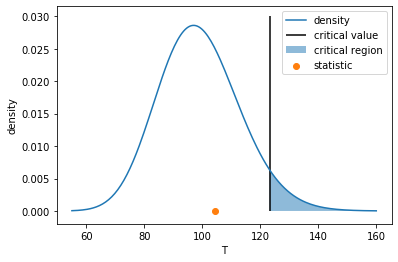

In [29]:
x = np.linspace(chi2.ppf(0.0001, df), chi2.ppf(0.9999, df), 200)
xtail = np.linspace(chi2.ppf(0.95, df), chi2.ppf(0.9999, df), 100)
plt.plot(x, chi2.pdf(x, df))
plt.vlines(chi2.ppf(0.95, df), 0, 0.03)
plt.fill_between(xtail,chi2.pdf(xtail, df), alpha=.5)
plt.scatter([T],[0])
plt.xlabel("T")
plt.ylabel("density")
plt.legend(["density", "critical value", "critical region", "statistic"])

*Since the statistic does not fall into the critical region, there is insufficient evidence to reject $H_0$, that is, the emission rate $\lambda$ being constant.*

# P-values

Recall that a hypothesis test on hypothesis $H_0: \theta \in \Theta$ and $H_1: \theta \in \Theta^C$ is characterised by the critical region on space of samples $Y$, namely $R$. The test is of level $\alpha$ if $\sup_{\theta \in \Theta} \mathbb{E}_\theta(\mathbb{I}_R(Y)) \leq \alpha$ and the p-value is defined as $p = \inf_\alpha \{\mathbb{I}_R(Y) = 1\}$. Read  the statement by the American Statistical Association about p-values (Wasserstein and Lazar: The ASA’s statement on p-values: context, process, and purpose) and respon  to the following scenarios.

**Part (a):** A friend looking at your notes from the first lecture saw that there’s a p-value of 0.0012 for the HIP study.   They ask you, does that mean there’s a 99.88% chance that offering a mammography decreases the risk of death from breast cancer? Explain to your friend exactly what this p-value means, including any assumptions that were made.

*Solution: P-values here indicates how the data provided here is incompatible with the hypothesis that offering a mammography decreases the risk of death from breast cancer, provided that the model assumption on Page 5 of notes holds.*

**Part (b):** Your colleague in education studies cares about what can improve the education outcomein early childhood.  He thinks the ideal planning should be to include as many variables aspossible and regress children’s educational outcome on the set. Then we select the variables that are shown to be statistically significant and inform the policy makers. Is this approach likely to produce the intended good policies?

*Solution: This is known as the (Greedy) backward selection which is a naive approach to variable selections. Determining whether a variable is known to be statistically significant uses threshold values, which is generally not reliable since (1) p-value is not independent on dataset (so is subject to error) and (2) p-value is likely to be affected when variables are dropped. More advanced techniques like ridge regression and LASSO should be used.*

**Part (c):** An economist collects data on many nation-wise variables and surprisingly finds that if she runs a regression between chocolate consumption and number of Nobel prize laureates, the coefficient is statistically significant. Should she conclude that there exists a relationship between Nobel prize and chocolate consumption?

*Solution: Correlation does not imply causation! Rather, the economist should try to understand what common hidden features both chocolate consumption and number of Nobel prize laureates have with reasoning.*

**Part (d)**: Your lab collects individual-level data on 50000 humans for 100 features, including IQ and chocolate consumption.  They find that their initial hypothesis about the relation betweenchocolate consumption and IQ has a p-value higher than 0.05.   However, they find thatthere are other variables in the data set that have p-value less than 0.05, namely, a subject’s family income and number of siblings. They therefore decide to not write about chocolate consumption, but rather, report these statistically significant results in their paper, and provide possible explanations. Is this sound scientific practice?

*Solution: He should not! Firstly, this violates the rule of transparency. Secondly, the p-value is highly dependent with data, which makes his result less likely to be replicated.*

**Part (e):** A neuroscience lab lab runs a randomized experiment on 100 mice by adding chocolate inhalf  of  the  mice’s  diet  and  another  food  of  the  equivalent  calories  in  another  half’s  diet. They find that the difference between the two groups’ time in solving a maze puzzle has p-value lower then 0.05.  Should they conclude that chocolate consumption leads to improved cognitive power in mice?

*Solution: This seems convincing (even though conclusion solely based on threshold of p-value is suspicious), but I would appreciate if they can look at **why** chocolate consumption leads to improved cognitive power and perform more careful experiments. Also remember to be transparent in how they do the experiments and perform data analysis (e.g. what assumption), just to make sure they are not hacking the p-value.*

**Part (f):** Should p-values be banned from scientific papers?  Provide at least one argument for and against this proposal.

*Solution: For: just to make sure people are not abusing the p-value and not doing more careful analysis. Against: it still serves as an evidence on whether the data is incompatible with assumptions.*